# Import Library

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os 
from datetime import datetime 
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.ensemble import IsolationForest

In [ ]:
df=pd. read_csv('81250_202302_BeltCurrent.csv', engine='python', encoding='utf-8', error_bad_lines=False)
df

floatvalue        t_stamp
0       17.992546  1675209793867
1       18.385374  1675209813868
2       18.549816  1675209833869
3       18.448912  1675209853870
4       18.515699  1675209873872
...           ...            ...
60483   19.219530  1677628600856
60484   19.165195  1677628640859
60485   19.222761  1677628660861
60486   19.225843  1677628680863
60487   19.273302  1677628700864

[60488 rows x 2 columns]

In [ ]:
df.index.freq="MS"
df['t_stamp']= pd.to_datetime(df['t_stamp'], unit='ms') ##, unit='ms'
#df=df.iloc[3535:9200]
df

floatvalue                 t_stamp
0       17.992546 2023-02-01 00:03:13.867
1       18.385374 2023-02-01 00:03:33.868
2       18.549816 2023-02-01 00:03:53.869
3       18.448912 2023-02-01 00:04:13.870
4       18.515699 2023-02-01 00:04:33.872
...           ...                     ...
60483   19.219530 2023-02-28 23:56:40.856
60484   19.165195 2023-02-28 23:57:20.859
60485   19.222761 2023-02-28 23:57:40.861
60486   19.225843 2023-02-28 23:58:00.863
60487   19.273302 2023-02-28 23:58:20.864

[60488 rows x 2 columns]

<AxesSubplot:>

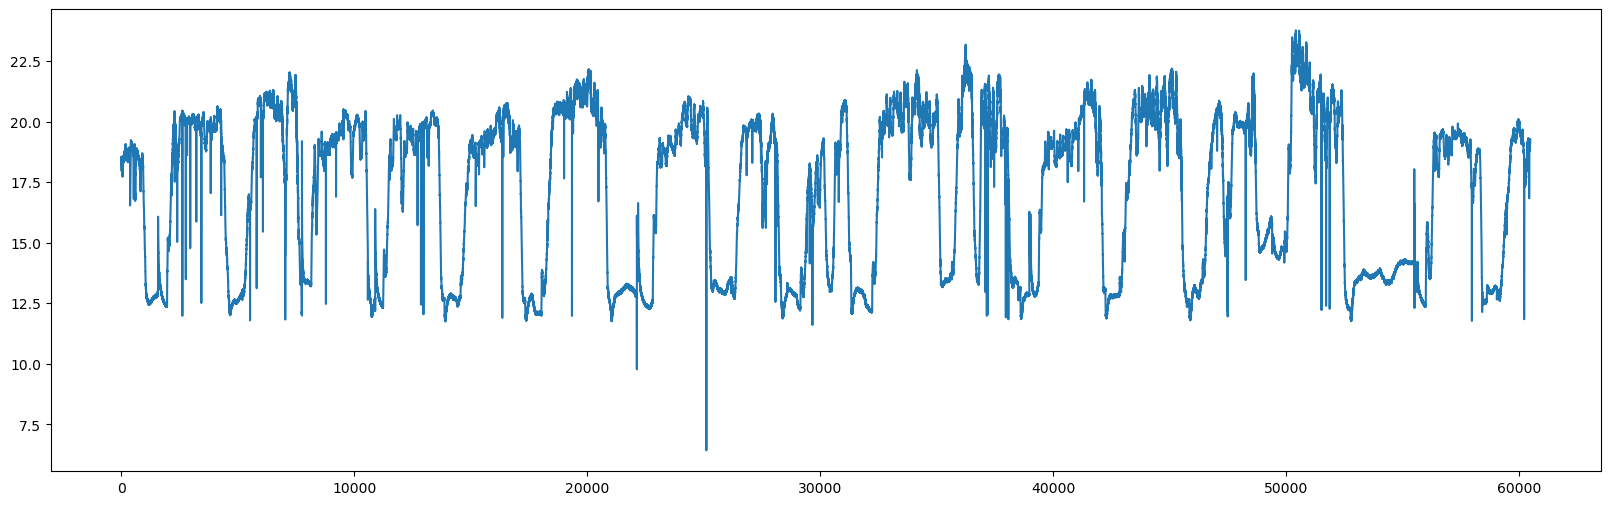

In [ ]:
df['floatvalue'].plot(figsize=(20,6))

In [ ]:
count = (df['floatvalue'] == 0).sum()
print('Count of zeros in Column floatvalue : ', count)

Count of zeros in Column floatvalue :  0


In [ ]:
count = (df['floatvalue'] == 'NaN').sum()
print('Count of NaNs in Column floatvalue : ', count)

Count of NaNs in Column floatvalue :  0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60488 entries, 0 to 60487
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   floatvalue  60488 non-null  float64       
 1   t_stamp     60488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 945.2 KB


In [ ]:
df=df.set_index('t_stamp').resample("H").mean()
df.head(), df.tail()

(                     floatvalue
 t_stamp                        
 2023-02-01 00:00:00   18.356562
 2023-02-01 01:00:00   18.710471
 2023-02-01 02:00:00   18.498388
 2023-02-01 03:00:00   18.938417
 2023-02-01 04:00:00   18.105812,
                      floatvalue
 t_stamp                        
 2023-02-28 19:00:00   19.436618
 2023-02-28 20:00:00   19.771868
 2023-02-28 21:00:00   19.172429
 2023-02-28 22:00:00   17.864043
 2023-02-28 23:00:00   19.010759)

In [ ]:
my_final_df= df.reset_index()[['t_stamp','floatvalue']].rename({'t_stamp':'ds','floatvalue':'y'},axis='columns')
my_final_df

ds          y
0   2023-02-01 00:00:00  18.356562
1   2023-02-01 01:00:00  18.710471
2   2023-02-01 02:00:00  18.498388
3   2023-02-01 03:00:00  18.938417
4   2023-02-01 04:00:00  18.105812
..                  ...        ...
667 2023-02-28 19:00:00  19.436618
668 2023-02-28 20:00:00  19.771868
669 2023-02-28 21:00:00  19.172429
670 2023-02-28 22:00:00  17.864043
671 2023-02-28 23:00:00  19.010759

[672 rows x 2 columns]

In [ ]:
NewCurrentDrumValue=df.reset_index()[['t_stamp','floatvalue']].rename({'t_stamp':'ds','floatvalue':'y'},axis='columns')
NewCurrentDrumValue

ds          y
0   2023-02-01 00:00:00  18.356562
1   2023-02-01 01:00:00  18.710471
2   2023-02-01 02:00:00  18.498388
3   2023-02-01 03:00:00  18.938417
4   2023-02-01 04:00:00  18.105812
..                  ...        ...
667 2023-02-28 19:00:00  19.436618
668 2023-02-28 20:00:00  19.771868
669 2023-02-28 21:00:00  19.172429
670 2023-02-28 22:00:00  17.864043
671 2023-02-28 23:00:00  19.010759

[672 rows x 2 columns]

In [ ]:
train=NewCurrentDrumValue[(NewCurrentDrumValue['ds'] >= '2023-02-01') & (NewCurrentDrumValue['ds'] <='2023-02-27')]
test=NewCurrentDrumValue[(NewCurrentDrumValue['ds']>'2023-02-27')]

In [ ]:
train.head(30)

ds          y
0  2023-02-01 00:00:00  18.356562
1  2023-02-01 01:00:00  18.710471
2  2023-02-01 02:00:00  18.498388
3  2023-02-01 03:00:00  18.938417
4  2023-02-01 04:00:00  18.105812
5  2023-02-01 05:00:00  18.571295
6  2023-02-01 06:00:00  18.087063
7  2023-02-01 07:00:00  14.889804
8  2023-02-01 08:00:00  12.586859
9  2023-02-01 09:00:00  12.585538
10 2023-02-01 10:00:00  12.746899
11 2023-02-01 11:00:00  12.845071
12 2023-02-01 12:00:00        NaN
13 2023-02-01 13:00:00        NaN
14 2023-02-01 14:00:00        NaN
15 2023-02-01 15:00:00        NaN
16 2023-02-01 16:00:00        NaN
17 2023-02-01 17:00:00        NaN
18 2023-02-01 18:00:00        NaN
19 2023-02-01 19:00:00        NaN
20 2023-02-01 20:00:00        NaN
21 2023-02-01 21:00:00        NaN
22 2023-02-01 22:00:00        NaN
23 2023-02-01 23:00:00        NaN
24 2023-02-02 00:00:00        NaN
25 2023-02-02 01:00:00        NaN
26 2023-02-02 02:00:00        NaN
27 2023-02-02 03:00:00        NaN
28 2023-02-02 04:00:00        NaN
29 2023-02-02 05:00:00        NaN

In [ ]:
test

ds          y
625 2023-02-27 01:00:00        NaN
626 2023-02-27 02:00:00  15.635210
627 2023-02-27 03:00:00        NaN
628 2023-02-27 04:00:00        NaN
629 2023-02-27 05:00:00        NaN
630 2023-02-27 06:00:00  13.954421
631 2023-02-27 07:00:00  13.136661
632 2023-02-27 08:00:00        NaN
633 2023-02-27 09:00:00  13.387088
634 2023-02-27 10:00:00  12.826073
635 2023-02-27 11:00:00  12.500744
636 2023-02-27 12:00:00  14.565025
637 2023-02-27 13:00:00  13.974088
638 2023-02-27 14:00:00  17.410088
639 2023-02-27 15:00:00  19.100534
640 2023-02-27 16:00:00  18.431888
641 2023-02-27 17:00:00  19.471736
642 2023-02-27 18:00:00  18.792255
643 2023-02-27 19:00:00  18.748084
644 2023-02-27 20:00:00  18.978203
645 2023-02-27 21:00:00  19.499141
646 2023-02-27 22:00:00  19.447348
647 2023-02-27 23:00:00  19.501197
648 2023-02-28 00:00:00  19.271740
649 2023-02-28 01:00:00  19.120692
650 2023-02-28 02:00:00  18.608959
651 2023-02-28 03:00:00  17.284025
652 2023-02-28 04:00:00  18.201837
653 2023-02-28 05:00:00  18.443191
654 2023-02-28 06:00:00  13.403629
655 2023-02-28 07:00:00  12.573818
656 2023-02-28 08:00:00  12.677323
657 2023-02-28 09:00:00        NaN
658 2023-02-28 10:00:00  13.072241
659 2023-02-28 11:00:00  12.962649
660 2023-02-28 12:00:00  13.125388
661 2023-02-28 13:00:00  12.883752
662 2023-02-28 14:00:00  13.317404
663 2023-02-28 15:00:00  15.167709
664 2023-02-28 16:00:00  16.656290
665 2023-02-28 17:00:00  18.089026
666 2023-02-28 18:00:00  19.411973
667 2023-02-28 19:00:00  19.436618
668 2023-02-28 20:00:00  19.771868
669 2023-02-28 21:00:00  19.172429
670 2023-02-28 22:00:00  17.864043
671 2023-02-28 23:00:00  19.010759

In [ ]:
m= Prophet(changepoint_range=0.95)

In [ ]:
m.fit(train)

09:27:00 - cmdstanpy - INFO - Chain [1] start processing
09:27:00 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
m.params

OrderedDict([('lp__', array([[888.712]])),
             ('k', array([[-0.0305649]])),
             ('m', array([[0.742139]])),
             ('delta',
              array([[ 8.11627e-09,  6.46880e-09,  1.09808e-07, -8.21669e-10,
                       7.15611e-09,  1.15953e-08,  1.20533e-09,  1.11162e-08,
                       1.73350e-08,  1.42675e-09,  5.92157e-07,  1.27841e-07,
                       1.43764e-02,  2.11331e-02,  1.43856e-05, -3.96880e-10,
                       1.05813e-10,  1.28804e-08, -1.63409e-10, -6.67067e-07,
                      -1.93661e-03, -7.61578e-04, -7.77608e-09,  7.98526e-11,
                      -1.73549e-08]])),
             ('sigma_obs', array([[0.0670747]])),
             ('beta',
              array([[-0.0117671 ,  0.051329  ,  0.0336253 , -0.0581763 , -0.0262837 ,
                       0.0181606 , -0.076571  ,  0.11928   ,  0.0591109 , -0.016821  ,
                       0.00353226, -0.00232447, -0.0122155 , -0.0165933 ]])),
             ('tre

In [ ]:
future = m.make_future_dataframe(periods=2, freq='D')
future.head(), future.tail()

(                   ds
 0 2023-02-01 00:00:00
 1 2023-02-01 01:00:00
 2 2023-02-01 02:00:00
 3 2023-02-01 03:00:00
 4 2023-02-01 04:00:00,
                      ds
 622 2023-02-26 22:00:00
 623 2023-02-26 23:00:00
 624 2023-02-27 00:00:00
 625 2023-02-28 00:00:00
 626 2023-03-01 00:00:00)

In [ ]:
df=df.iloc[601:602]
df

floatvalue
t_stamp                        
2023-02-26 01:00:00   14.231983

In [ ]:
forecast= m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]
##ds: the datestamp of the forecasted value
##yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to 
##represent the predicted values of a value y)
##yhat_lower: the lower bound of our forecasts
##yhat_upper: the upper bound of our forecasts

ds       yhat  yhat_lower  yhat_upper
0   2023-02-01 00:00:00  19.047711   17.066314   20.974703
1   2023-02-01 01:00:00  19.246588   17.303895   21.185541
2   2023-02-01 02:00:00  19.625377   17.708674   21.660379
3   2023-02-01 03:00:00  19.651167   17.798083   21.591232
4   2023-02-01 04:00:00  18.843140   16.910915   20.782195
..                  ...        ...         ...         ...
622 2023-02-26 22:00:00  17.564309   15.758595   19.506120
623 2023-02-26 23:00:00  17.580917   15.626987   19.573279
624 2023-02-27 00:00:00  17.657922   15.552681   19.546367
625 2023-02-28 00:00:00  19.636185   17.712261   21.539516
626 2023-03-01 00:00:00  18.701309   16.690185   20.592190

[627 rows x 4 columns]

<AxesSubplot:xlabel='ds'>

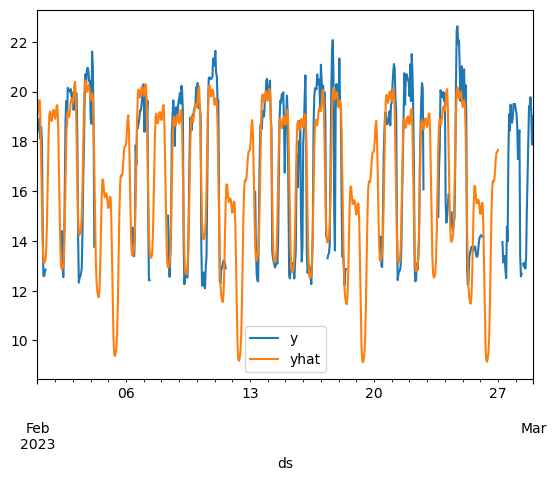

In [ ]:
pd.concat([my_final_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

<AxesSubplot:xlabel='ds'>

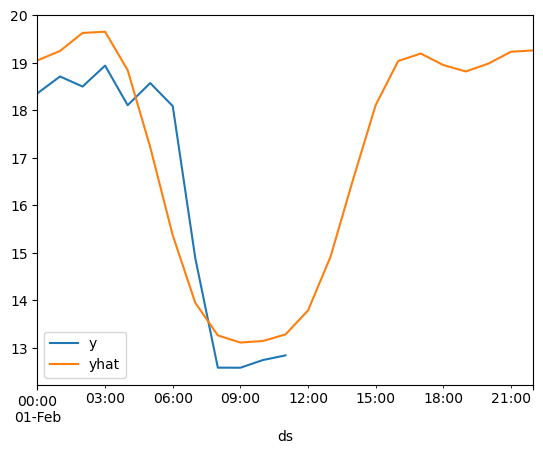

In [ ]:
pd.concat([my_final_df.set_index('ds')['y'].iloc[:23],forecast.set_index('ds')['yhat'].iloc[:23]],axis=1).plot() ## compred with 2023-02-01 actual data vs predict data  

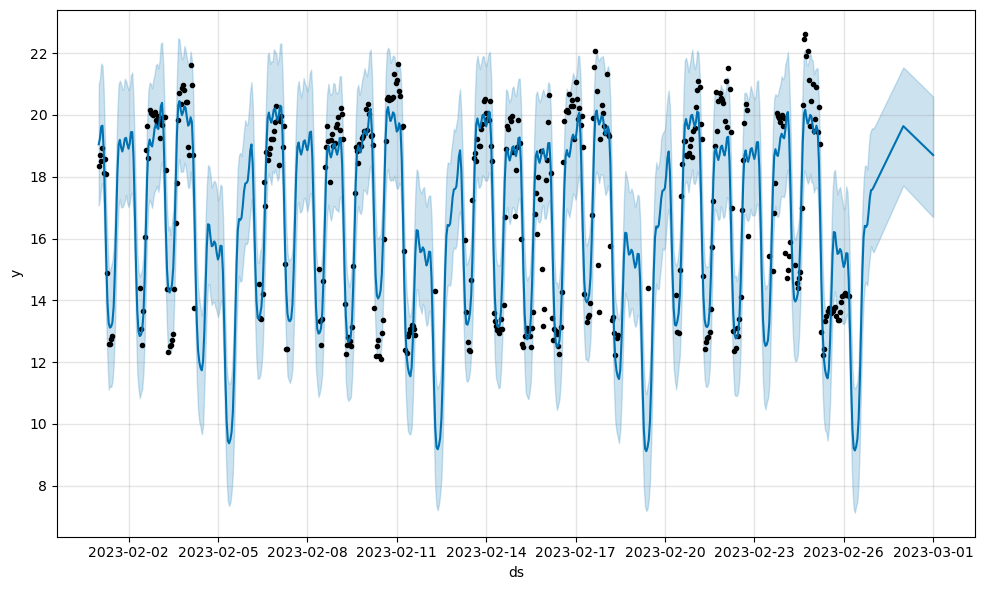

In [ ]:
fig1=m.plot(forecast)

In [ ]:
from prophet.plot import add_changepoints_to_plot

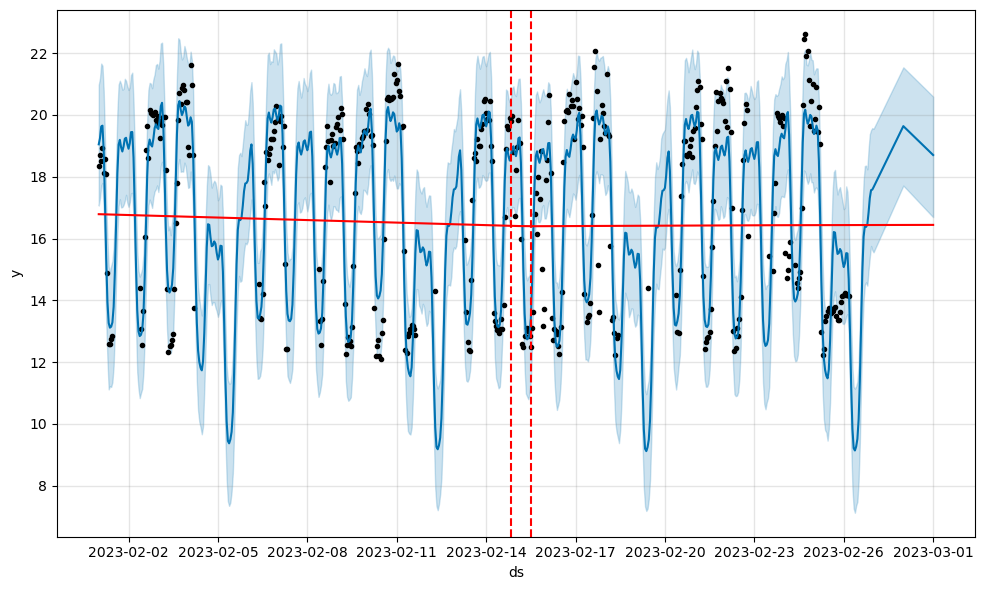

In [ ]:
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

In [ ]:
results=pd.concat([NewCurrentDrumValue.set_index('ds')['y'],forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]],axis=1)

In [ ]:
results

y       yhat  yhat_lower  yhat_upper
ds                                                               
2023-02-01 00:00:00  18.356562  19.047711   17.066314   20.974703
2023-02-01 01:00:00  18.710471  19.246588   17.303895   21.185541
2023-02-01 02:00:00  18.498388  19.625377   17.708674   21.660379
2023-02-01 03:00:00  18.938417  19.651167   17.798083   21.591232
2023-02-01 04:00:00  18.105812  18.843140   16.910915   20.782195
...                        ...        ...         ...         ...
2023-02-28 20:00:00  19.771868        NaN         NaN         NaN
2023-02-28 21:00:00  19.172429        NaN         NaN         NaN
2023-02-28 22:00:00  17.864043        NaN         NaN         NaN
2023-02-28 23:00:00  19.010759        NaN         NaN         NaN
2023-03-01 00:00:00        NaN  18.701309   16.690185   20.592190

[673 rows x 4 columns]

In [ ]:
results['error']=results['y'] - results['yhat']

In [ ]:
results['Uncertainty']=results['yhat_upper'] - results['yhat_lower']
results.tail()

y       yhat  yhat_lower  yhat_upper  error  \
ds                                                                         
2023-02-28 20:00:00  19.771868        NaN         NaN         NaN    NaN   
2023-02-28 21:00:00  19.172429        NaN         NaN         NaN    NaN   
2023-02-28 22:00:00  17.864043        NaN         NaN         NaN    NaN   
2023-02-28 23:00:00  19.010759        NaN         NaN         NaN    NaN   
2023-03-01 00:00:00        NaN  18.701309   16.690185    20.59219    NaN   

                     Uncertainty  
ds                                
2023-02-28 20:00:00          NaN  
2023-02-28 21:00:00          NaN  
2023-02-28 22:00:00          NaN  
2023-02-28 23:00:00          NaN  
2023-03-01 00:00:00     3.902005

In [ ]:
results[results['error'].abs()> 1.5*results['Uncertainty']]

y       yhat  yhat_lower  yhat_upper     error  \
ds                                                                            
2023-02-15 22:00:00  13.169682  18.896390   17.081723   20.830512 -5.726709   
2023-02-17 19:00:00  13.612594  19.689172   17.790036   21.750364 -6.076578   

                     Uncertainty  
ds                                
2023-02-15 22:00:00     3.748788  
2023-02-17 19:00:00     3.960328

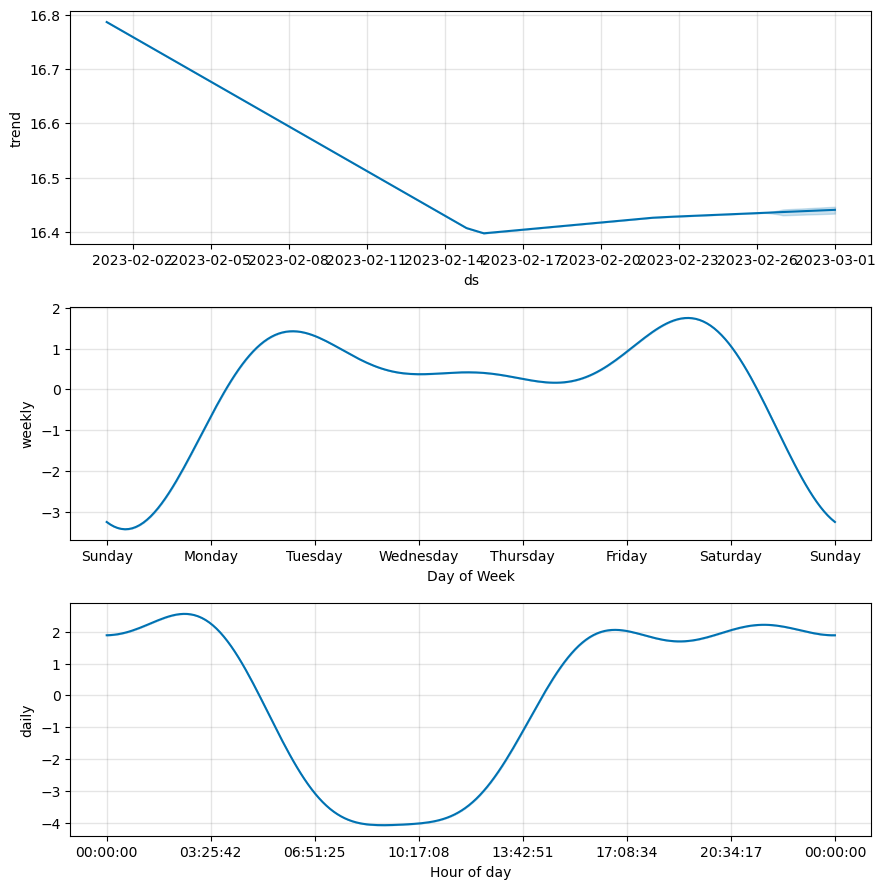

In [ ]:
comp=m.plot_components(forecast)

In [ ]:
results

y       yhat  yhat_lower  yhat_upper     error  \
ds                                                                            
2023-02-01 00:00:00  18.356562  19.047711   17.066314   20.974703 -0.691149   
2023-02-01 01:00:00  18.710471  19.246588   17.303895   21.185541 -0.536117   
2023-02-01 02:00:00  18.498388  19.625377   17.708674   21.660379 -1.126988   
2023-02-01 03:00:00  18.938417  19.651167   17.798083   21.591232 -0.712750   
2023-02-01 04:00:00  18.105812  18.843140   16.910915   20.782195 -0.737328   
...                        ...        ...         ...         ...       ...   
2023-02-28 20:00:00  19.771868        NaN         NaN         NaN       NaN   
2023-02-28 21:00:00  19.172429        NaN         NaN         NaN       NaN   
2023-02-28 22:00:00  17.864043        NaN         NaN         NaN       NaN   
2023-02-28 23:00:00  19.010759        NaN         NaN         NaN       NaN   
2023-03-01 00:00:00        NaN  18.701309   16.690185   20.592190       NaN   

                     Uncertainty  
ds                                
2023-02-01 00:00:00     3.908389  
2023-02-01 01:00:00     3.881646  
2023-02-01 02:00:00     3.951705  
2023-02-01 03:00:00     3.793149  
2023-02-01 04:00:00     3.871280  
...                          ...  
2023-02-28 20:00:00          NaN  
2023-02-28 21:00:00          NaN  
2023-02-28 22:00:00          NaN  
2023-02-28 23:00:00          NaN  
2023-03-01 00:00:00     3.902005  

[673 rows x 6 columns]

In [ ]:
results['error']=results['y'] - results['yhat']

In [ ]:
results['Uncertainty']=results['yhat_upper'] - results['yhat_lower']
results

y       yhat  yhat_lower  yhat_upper     error  \
ds                                                                            
2023-02-01 00:00:00  18.356562  19.047711   17.066314   20.974703 -0.691149   
2023-02-01 01:00:00  18.710471  19.246588   17.303895   21.185541 -0.536117   
2023-02-01 02:00:00  18.498388  19.625377   17.708674   21.660379 -1.126988   
2023-02-01 03:00:00  18.938417  19.651167   17.798083   21.591232 -0.712750   
2023-02-01 04:00:00  18.105812  18.843140   16.910915   20.782195 -0.737328   
...                        ...        ...         ...         ...       ...   
2023-02-28 20:00:00  19.771868        NaN         NaN         NaN       NaN   
2023-02-28 21:00:00  19.172429        NaN         NaN         NaN       NaN   
2023-02-28 22:00:00  17.864043        NaN         NaN         NaN       NaN   
2023-02-28 23:00:00  19.010759        NaN         NaN         NaN       NaN   
2023-03-01 00:00:00        NaN  18.701309   16.690185   20.592190       NaN   

                     Uncertainty  
ds                                
2023-02-01 00:00:00     3.908389  
2023-02-01 01:00:00     3.881646  
2023-02-01 02:00:00     3.951705  
2023-02-01 03:00:00     3.793149  
2023-02-01 04:00:00     3.871280  
...                          ...  
2023-02-28 20:00:00          NaN  
2023-02-28 21:00:00          NaN  
2023-02-28 22:00:00          NaN  
2023-02-28 23:00:00          NaN  
2023-03-01 00:00:00     3.902005  

[673 rows x 6 columns]

In [ ]:
results[results['error'].abs()> 1.5*results['Uncertainty']]

y       yhat  yhat_lower  yhat_upper     error  \
ds                                                                            
2023-02-15 22:00:00  13.169682  18.896390   17.081723   20.830512 -5.726709   
2023-02-17 19:00:00  13.612594  19.689172   17.790036   21.750364 -6.076578   

                     Uncertainty  
ds                                
2023-02-15 22:00:00     3.748788  
2023-02-17 19:00:00     3.960328

In [ ]:
results

y       yhat  yhat_lower  yhat_upper     error  \
ds                                                                            
2023-02-01 00:00:00  18.356562  19.047711   17.066314   20.974703 -0.691149   
2023-02-01 01:00:00  18.710471  19.246588   17.303895   21.185541 -0.536117   
2023-02-01 02:00:00  18.498388  19.625377   17.708674   21.660379 -1.126988   
2023-02-01 03:00:00  18.938417  19.651167   17.798083   21.591232 -0.712750   
2023-02-01 04:00:00  18.105812  18.843140   16.910915   20.782195 -0.737328   
...                        ...        ...         ...         ...       ...   
2023-02-28 20:00:00  19.771868        NaN         NaN         NaN       NaN   
2023-02-28 21:00:00  19.172429        NaN         NaN         NaN       NaN   
2023-02-28 22:00:00  17.864043        NaN         NaN         NaN       NaN   
2023-02-28 23:00:00  19.010759        NaN         NaN         NaN       NaN   
2023-03-01 00:00:00        NaN  18.701309   16.690185   20.592190       NaN   

                     Uncertainty  
ds                                
2023-02-01 00:00:00     3.908389  
2023-02-01 01:00:00     3.881646  
2023-02-01 02:00:00     3.951705  
2023-02-01 03:00:00     3.793149  
2023-02-01 04:00:00     3.871280  
...                          ...  
2023-02-28 20:00:00          NaN  
2023-02-28 21:00:00          NaN  
2023-02-28 22:00:00          NaN  
2023-02-28 23:00:00          NaN  
2023-03-01 00:00:00     3.902005  

[673 rows x 6 columns]

In [ ]:
results['anomaly']= results.apply(lambda x:'Yes' if(np.abs(x['error']) > 1.5*x ['Uncertainty']) else 'No', axis=1)

In [ ]:
results

y       yhat  yhat_lower  yhat_upper     error  \
ds                                                                            
2023-02-01 00:00:00  18.356562  19.047711   17.066314   20.974703 -0.691149   
2023-02-01 01:00:00  18.710471  19.246588   17.303895   21.185541 -0.536117   
2023-02-01 02:00:00  18.498388  19.625377   17.708674   21.660379 -1.126988   
2023-02-01 03:00:00  18.938417  19.651167   17.798083   21.591232 -0.712750   
2023-02-01 04:00:00  18.105812  18.843140   16.910915   20.782195 -0.737328   
...                        ...        ...         ...         ...       ...   
2023-02-28 20:00:00  19.771868        NaN         NaN         NaN       NaN   
2023-02-28 21:00:00  19.172429        NaN         NaN         NaN       NaN   
2023-02-28 22:00:00  17.864043        NaN         NaN         NaN       NaN   
2023-02-28 23:00:00  19.010759        NaN         NaN         NaN       NaN   
2023-03-01 00:00:00        NaN  18.701309   16.690185   20.592190       NaN   

                     Uncertainty anomaly  
ds                                        
2023-02-01 00:00:00     3.908389      No  
2023-02-01 01:00:00     3.881646      No  
2023-02-01 02:00:00     3.951705      No  
2023-02-01 03:00:00     3.793149      No  
2023-02-01 04:00:00     3.871280      No  
...                          ...     ...  
2023-02-28 20:00:00          NaN      No  
2023-02-28 21:00:00          NaN      No  
2023-02-28 22:00:00          NaN      No  
2023-02-28 23:00:00          NaN      No  
2023-03-01 00:00:00     3.902005      No  

[673 rows x 7 columns]

In [ ]:
fig = px.scatter(results.reset_index(), x='ds', y='y', color='anomaly', title='81250 Current Drum in Feb ')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1,label="1m",step="month",stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()